## Preprocessing Data

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [127]:
#plt.rcParams["figure.figsize"]=[6,4]
plt.rcParams["figure.figsize"] = (12,8)

In [128]:
df = pd.read_csv('/content/drive/MyDrive/Project_data/NCKU_DSAI/HW1/export.csv',encoding='utf-8')
df

,日期,淨尖峰供電能力(MW),尖峰負載(MW),備轉容量(MW),備轉容量率(%),工業用電(百萬度),民生用電(百萬度),核一#1(萬瓩),核一#2(萬瓩),核二#1(萬瓩),核二#2(萬瓩),核三#1,核三#2,林口#1,林口#2,林口#3,台中#1,台中#2,台中#3,台中#4,台中#5,台中#6,台中#7,台中#8,台中#9,台中#10,興達#1,興達#2,興達#3,興達#4,大林#1,大林#2,和平#1,和平#2,麥寮#1,麥寮#2,麥寮#3,汽電共生,大潭 (#1-#6),通霄 (#1-#6),興達 (#1-#5),南部 (#1-#4),大林(#5-#6),海湖 (#1-#2),國光 #1,新桃#1,星彰#1,星元#1,嘉惠#1,豐德(#1-#2),協和 (#1-#4),氣渦輪,離島,德基,青山,谷關,天輪,馬鞍,萬大,大觀,鉅工,大觀二,明潭,碧海,立霧,龍澗,卓蘭,水里,其他小水力,風力發電,太陽能發電
0,20190101,26429,23872,2557.0,10.71,279.870,192.192,0,0,98.4,98.3,94.3,0.0,76.0,76.1,NaN,52.5,0.0,0.0,52.1,52.5,52.2,51.9,0.0,47.3,0.0,28.1,28.1,38.4,52.5,75.6,76.4,56.3,56.5,56.8,0.0,52.3,39.7,217.2,128.8,79.9,104.9,74.9,45.9,0.0,0.0,53.7,56.9,0.0,105.0,13.3,0.0,10.9,0.0,2.7,2.5,2.2,1.2,0.9,0.0,0.1,16.0,54.0,0.0,1.2,3.0,2.2,0.0,24.3,50.9,0.0
1,20190102,30047,28148,1899.0,6.75,323.080,221.864,0,0,98.5,98.6,94.3,0.0,76.0,76.0,NaN,53.3,0.0,0.0,52.1,52.7,52.3,51.9,0.0,0.0,0.0,33.1,33.0,42.2,52.6,75.6,76.4,60.0,60.3,56.8,0.0,57.1,104.4,243.0,135.8,151.1,101.9,91.7,92.0,49.5,60.1,53.3,56.5,66.5,102.4,41.1,0.0,11.0,3.4,3.2,2.5,2.2,1.2,1.0,0.0,0.0,29.9,52.3,0.0,1.2,2.0,2.1,0.0,23.4,37.9,0.0
2,20190103,30343,28452,1891.0,6.65,336.597,231.146,0,0,98.7,98.6,94.1,0.0,75.9,75.9,NaN,53.3,0.0,0.0,52.0,52.7,52.2,51.9,0.0,0.0,0.0,28.2,28.1,37.8,52.6,75.8,76.4,59.9,49.3,56.8,0.0,57.1,104.0,261.6,129.0,147.5,93.8,91.6,92.0,49.2,60.2,53.4,56.3,66.5,104.0,86.9,0.0,10.9,3.1,1.4,2.5,2.2,1.1,2.4,1.9,0.5,14.3,65.5,0.0,1.4,1.2,2.0,0.1,24.1,41.6,0.0
3,20190104,30301,28490,1811.0,6.36,339.020,232.810,0,0,98.7,98.4,94.1,0.0,76.0,76.0,NaN,53.2,0.0,0.0,52.3,52.8,52.2,51.9,0.0,0.0,0.0,32.7,33.1,38.4,52.6,75.6,76.4,60.2,0.0,56.8,0.0,57.1,106.9,315.1,147.8,160.6,87.6,91.6,92.0,49.0,60.2,53.6,56.6,66.6,103.1,75.2,0.0,11.4,3.9,3.7,2.5,2.2,1.2,1.0,3.4,1.0,18.1,52.3,0.0,1.4,1.4,0.0,0.0,19.3,12.4,11.0
4,20190105,27957,26054,1903.0,7.30,315.825,216.882,0,0,98.7,98.6,94.1,0.0,75.7,75.8,NaN,53.1,0.0,0.0,52.2,52.9,52.2,51.8,28.1,0.0,0.0,28.2,28.1,32.8,52.7,75.8,76.5,57.5,0.0,56.8,0.0,57.1,40.6,264.4,146.4,161.3,106.2,88.7,46.1,0.0,60.1,53.2,55.8,68.6,102.3,13.1,0.0,11.3,0.3,1.2,2.2,1.8,0.8,0.9,1.8,0.7,30.4,57.6,0.0,1.3,3.0,2.9,0.0,23.9,18.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,20201027,35071,31669,3402.0,10.74,362.462,309.405,0,0,98.1,89.9,94.4,94.2,75.8,76.0,75.9,40.0,0.0,0.0,39.9,38.0,43.9,0.0,0.0,40.5,41.0,0.0,23.0,0.0,28.5,76.0,76.1,60.4,60.3,41.0,40.9,57.4,71.6,375.1,277.9,165.6,113.4,98.4,91.8,47.3,62.9,50.4,51.6,68.9,97.6,13.5,0.0,11.4,2.5,5.3,3.8,3.7,0.0,1.0,1.0,0.1,43.5,63.8,4.8,1.4,1.9,1.7,0.8,13.9,34.6,41.5
666,20201028,35429,31959,3470.0,10.86,365.469,311.972,0,0,98.0,98.2,94.6,94.3,75.9,76.0,76.0,37.6,0.0,0.0,33.0,34.1,33.1,0.0,0.0,43.6,33.3,0.0,22.2,0.0,25.8,75.9,76.1,60.2,60.3,37.5,37.4,57.4,70.1,383.7,275.8,150.7,101.5,72.3,92.0,46.9,64.9,50.4,51.5,68.9,96.2,39.1,0.0,12.1,0.0,2.7,3.9,3.8,0.0,0.9,1.9,0.8,14.4,48.0,4.0,1.2,1.4,0.0,0.5,13.7,58.8,161.6
667,20201029,34978,31271,3707.0,11.86,362.440,309.387,0,0,97.8,98.0,94.6,94.3,76.0,76.1,76.2,37.5,0.0,0.0,32.8,34.0,33.0,0.0,0.0,43.4,33.4,0.0,23.1,0.0,25.7,75.7,76.2,60.3,60.2,37.8,37.4,57.3,79.3,352.6,278.4,163.6,103.3,43.2,92.0,47.9,60.0,50.5,51.4,66.4,96.7,13.5,0.0,12.3,3.3,6.4,4.3,4.1,0.0,0.9,0.8,0.2,20.5,50.0,1.0,1.2,1.3,0.0,0.5,16.2,60.8,143.3
668,20201030,34479,30264,4215.0,13.93,351.492,300.041,0,0,97.8,98.0,94.5,94.3,76.0,76.2,76.1,37.6,0.0,0.0,32.9,34.1,33.0,0.0,0.0,32.7,33.5,0.0,23.2,0.0,25.8,76.0,76.2,60.2,60.2,56.8,56.7,57.4,76.3,305.4,282.1,159.1,104.3,35.7,39.4,39.1,59.9,45.0,45.4,66.3,44.5,13.4,0.0,12.3,3.8,7.6,4.3,4.1,0.0,0.9,1.3,0.2,12.1,32.3,2.0,1.2,1.5,0.0,0.5,16.5,60.1,207.5


In [129]:
df2 = pd.read_csv('/content/drive/MyDrive/Project_data/NCKU_DSAI/HW1/export2.csv',encoding='utf-8')
df2

,日期,備轉容量(萬瓩),備轉容量率(%)
0,2020/01/01,279.0,11.01
1,2020/01/02,308.0,10.91
2,2020/01/03,338.3,11.96
3,2020/01/04,363.6,14.21
4,2020/01/05,269.5,10.88
...,...,...,...
345,2020/12/11,312.9,10.46
346,2020/12/12,328.2,12.31
347,2020/12/13,283.0,11.12
348,2020/12/14,302.1,10.20


In [131]:
df = df[['日期', '備轉容量(MW)']]
df2 = df2[['日期','備轉容量(萬瓩)']]

In [132]:
date_list=[]
or_list=[]
for idx in range(len(df2)):
    date, or_ = df2.iloc[idx]
    or_ = or_*10
    date = date.split('/')
    date = ''.join(date)
    date = pd.to_datetime(date, format='%Y%m%d')
    date_list.append(date)
    or_list.append(or_)
df3 = pd.DataFrame({'日期':date_list, "備轉容量(MW)":or_list})
df3=df3.set_index('日期')
df3

,備轉容量(MW)
日期,
2020-01-01,2790.0
2020-01-02,3080.0
2020-01-03,3383.0
2020-01-04,3636.0
2020-01-05,2695.0
...,...
2020-12-11,3129.0
2020-12-12,3282.0
2020-12-13,2830.0


In [133]:
date_list=[]
or_list=[]
for idx in range(len(df)):
    date, or_ = df.iloc[idx]
    date = pd.to_datetime(date, format='%Y%m%d')
    date_list.append(date)
    or_list.append(or_)
df4 = pd.DataFrame({'日期':date_list, "備轉容量(MW)":or_list})
df4=df4.set_index('日期')
df4

,備轉容量(MW)
日期,
2019-01-01,2557.0
2019-01-02,1899.0
2019-01-03,1891.0
2019-01-04,1811.0
2019-01-05,1903.0
...,...
2020-10-27,3402.0
2020-10-28,3470.0
2020-10-29,3707.0


In [134]:
df5 = pd.concat([df3, df4]).sort_values('日期')
df5

,備轉容量(MW)
日期,
2019-01-01,2557.0
2019-01-02,1899.0
2019-01-03,1891.0
2019-01-04,1811.0
2019-01-05,1903.0
...,...
2020-12-11,3129.0
2020-12-12,3282.0
2020-12-13,2830.0


In [135]:
df5 = df5[~df5.index.duplicated(keep='first')]
df5

,備轉容量(MW)
日期,
2019-01-01,2557.0
2019-01-02,1899.0
2019-01-03,1891.0
2019-01-04,1811.0
2019-01-05,1903.0
...,...
2020-12-11,3129.0
2020-12-12,3282.0
2020-12-13,2830.0


In [136]:
# check if nan exist
df5.isna().sum()

備轉容量(MW)    0
dtype: int64

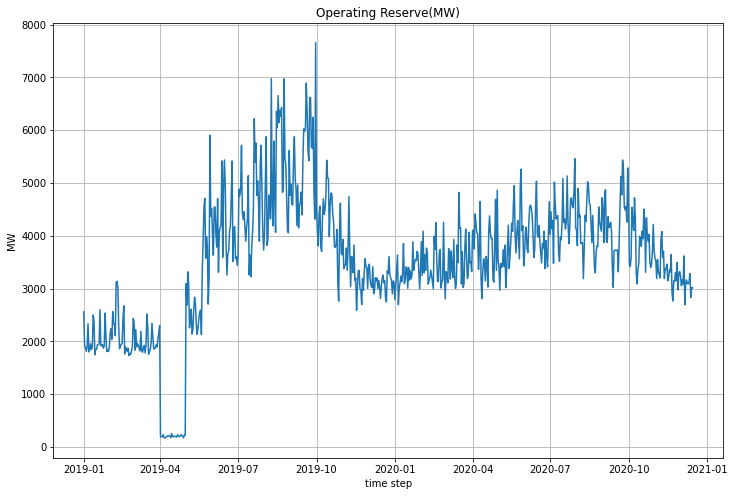

In [137]:
plt.title('Operating Reserve(MW)')
plt.plot(df5['備轉容量(MW)'])
plt.xlabel('time step')
plt.ylabel('MW')
plt.grid()
plt.show()

In [138]:
data = df5.values
data[:10]

array([[2557.],
       [1899.],
       [1891.],
       [1811.],
       [1903.],
       [2333.],
       [1800.],
       [1843.],
       [1954.],
       [1847.]])

split data

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data, test_size=0.1, random_state=0, shuffle=False)
print('training samples:',len(X_train))
print('validation samples:',len(X_test))

training samples: 643
validation samples: 72


In [141]:
X_train.shape

(643, 1)

### normaliation features

In [142]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
y_scaled = scaler.fit_transform(y_train)
X_test_scaled = scaler.fit_transform(X_test)
y_test_scaled = scaler.fit_transform(y_test)

In [143]:
def split_sequences(df_x, df_y, n_steps):
    X, y = list(), list()
    for i in range(len(df_x)):
        # find the end of this pattern
        end_ix = i + n_steps

        # check if we are beyond the dataset
        if end_ix > len(df_x)-1:
            break

        # gather input and output parts of the pattern
        seq_x, seq_y = df_x[i:end_ix,:], df_y[end_ix]
        X.append(seq_x)
        y.append(seq_y)

    return np.array(X), np.array(y)

train_window = 1 #<---------------------

X_train_split, y_train_split = split_sequences(X_scaled, y_scaled, train_window)
X_test_split, y_test_split = split_sequences(X_test_scaled, y_test_scaled, train_window)
print('split x_train:',len(X_train_split))
print('split x_test:',len(X_test_split))

split x_train: 642
split x_test: 71


In [144]:
X_train_split[:3]

array([[[0.31897392]],

       [[0.2311082 ]],

       [[0.23003993]]])

In [145]:
y_train_split[:3]

array([[0.2311082 ],
       [0.23003993],
       [0.21935716]])

## sk learn

In [146]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [147]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [148]:
# Train the model using the training sets
regr.fit(X_train_split.squeeze(1), y_train_split.squeeze())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [149]:
# Make predictions using the testing set
y_pred = regr.predict(X_test_split.squeeze(1))

In [150]:
y_pred

array([0.85784437, 0.72719487, 0.6666606 , 0.93579857, 0.75811525,
       0.31608444, 0.22593628, 0.34482733, 0.39011916, 0.61962678,
       0.59088389, 0.5364466 , 0.66099912, 0.59959386, 0.84303743,
       0.72937236, 0.32218142, 0.7716157 , 0.62441726, 0.57607695,
       0.63399822, 0.40666809, 0.36224726, 0.39229665, 0.49594525,
       0.71674291, 0.50073573, 0.43541098, 0.41537806, 0.26992162,
       0.42757201, 0.3265364 , 0.30214849, 0.2742766 , 0.59175489,
       0.65795063, 0.44455645, 0.49594525, 0.27079261, 0.35005331,
       0.34613383, 0.38924816, 0.25163069, 0.2755831 , 0.34482733,
       0.32435891, 0.46763786, 0.15625655, 0.08527032, 0.25075969,
       0.24596921, 0.32087492, 0.25075969, 0.40318411, 0.17759597,
       0.31260045, 0.3269719 , 0.29082554, 0.20938735, 0.26077615,
       0.22419429, 0.4567504 , 0.05304345, 0.23377525, 0.25903416,
       0.22854927, 0.22506529, 0.24379172, 0.31042296, 0.11357771,
       0.1967579 ])

In [151]:
# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test_split.squeeze(), y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test_split.squeeze(), y_pred))

Coefficients: 
 [0.88275513]
Mean squared error: 0.03
Coefficient of determination: 0.34


In [152]:
y_pred_all = regr.predict(data)

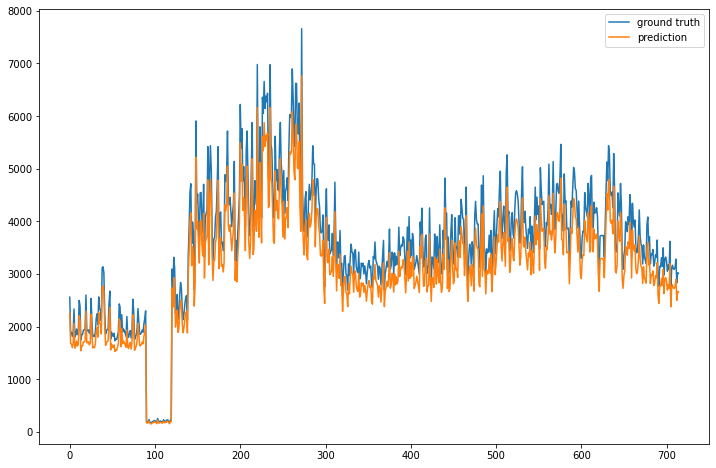

In [156]:
plt.plot(data, label='ground truth')
plt.plot(y_pred_all, label='prediction')
plt.legend()
plt.show()

In [163]:
np.sqrt(np.mean(np.abs(data.squeeze()-y_pred_all)))

20.367639085997613

In [177]:
data[0:20]

array([[2557.],
       [1899.],
       [1891.],
       [1811.],
       [1903.],
       [2333.],
       [1800.],
       [1843.],
       [1954.],
       [1847.],
       [1884.],
       [2497.],
       [2398.],
       [1745.],
       [1844.],
       [1849.],
       [1933.],
       [1935.],
       [1954.],
       [2599.]])

In [183]:
ans = []
pred_ = data[0]
print(pred_.reshape(-1,1))
print('='*20)
for i in range(20):
    pred_ = regr.predict(pred_.reshape(-1,1))
    print(pred_)
    ans.append(pred_)

[[2557.]]
[2257.25789913]
[1992.65902328]
[1759.08300945]
[1552.89258607]
[1370.87693302]
[1210.20168238]
[1068.36478135]
[943.15753]
[832.63018712]
[735.0616087]
[648.93244602]
[572.90148622]
[505.78476676]
[446.53713866]
[394.23599129]
[348.06688538]
[307.3108705]
[271.33328948]
[239.57389543]
[211.53812755]


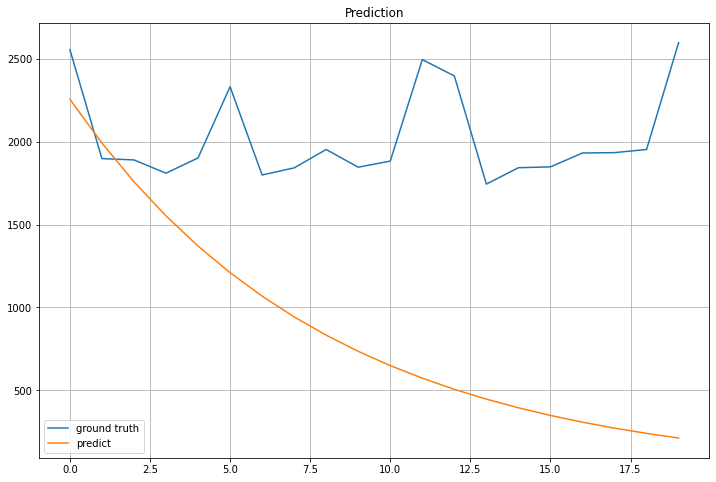

In [185]:
plt.title('Prediction')
plt.plot(data[0:20],label='ground truth')
plt.plot(ans,label='predict')
plt.legend()
plt.grid()
plt.show()

In [180]:
ans = []
pred_ = np.array([3186])
print(pred_.reshape(-1,1))
print('='*20)
for i in range(7):
    pred_ = regr.predict(pred_.reshape(-1,1))
    print(pred_)
    ans.append(pred_)

[[3186]]
[2812.51087302]
[2482.81143188]
[2191.76756038]
[1934.84709109]
[1708.04923]
[1507.84225568]
[1331.10852297]
